In [2]:
import numpy as np
import matplotlib.pyplot as pl
import matplotlib as mpl
import pandas as pd
import sys
sys.path.append("../")
import gyrochrones as gyr

pl.rc('xtick', labelsize=20)
pl.rc('ytick', labelsize=20)
pl.rc('axes', labelsize=25)
pl.rc('axes', titlesize=30)
pl.rc('legend', handlelength=3)
pl.rc('legend', fontsize=20)

%matplotlib inline

In [3]:
df = pd.read_hdf('../data/good.h5')

In [4]:
xcoord = df['galcen_x'] + 8300
ycoord = df['galcen_y']
angle = np.arctan(ycoord/xcoord)*180/np.pi

theta = np.array([10, 20, 30, 40, 50, 60, 70, 80])

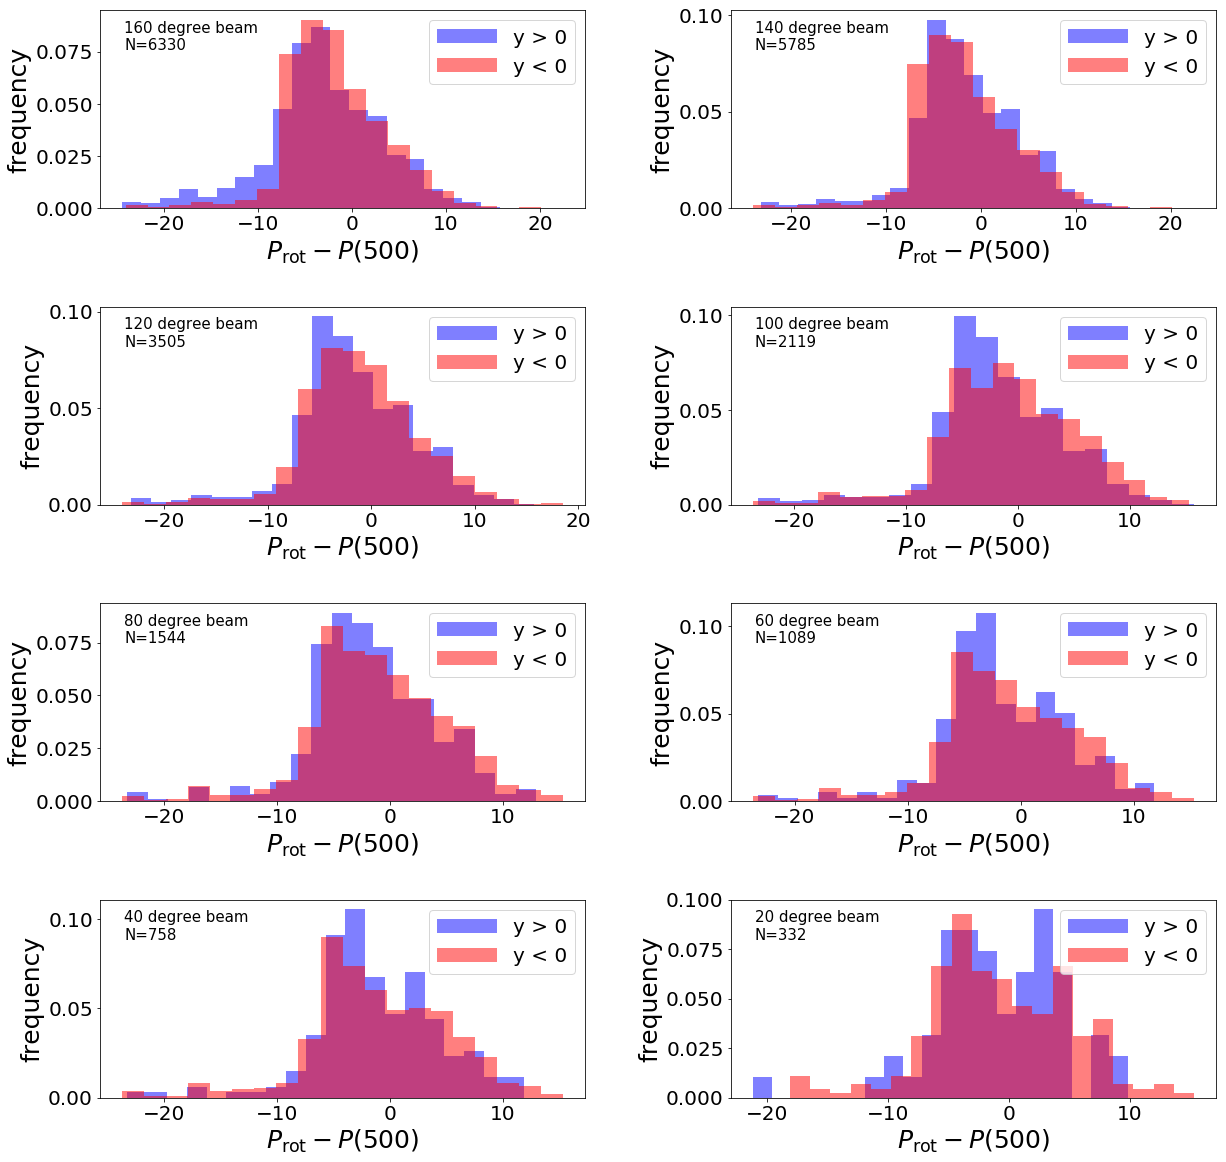

In [12]:
gyrochrone = gyr.MM09e3(df['B_V'], 600)
finite_age_mask = np.isfinite(gyrochrone)
fig, axs = pl.subplots(4, 2, figsize=(20, 20))
pl.subplots_adjust(wspace=0.3, hspace=0.5)
axs = np.concatenate(axs)
for i in range(len(theta)): 
    forward = (np.abs(angle) > theta[i]) & (ycoord > 0)
    backward = (np.abs(angle) > theta[i]) & (ycoord < 0)
    perdiff = np.exp(df['logperiod_mean'][finite_age_mask]) - gyrochrone[finite_age_mask]
    axs[i].annotate("{0} degree beam\nN={1}".format(180-2*theta[i], len(perdiff[forward])+len(perdiff[backward])), 
                    xy=(0.05, 0.8), xycoords='axes fraction', fontsize=15)
    axs[i].hist(perdiff[forward], color='b', density=True, bins=20, alpha=0.5, label="y > 0")
    axs[i].hist(perdiff[backward], color='r', density=True, bins=20, alpha=0.5, label="y < 0")
    axs[i].legend(loc="upper right")
    axs[i].set_xlabel(r'$P_\mathrm{rot} - P(500)$')
    axs[i].set_ylabel('frequency')

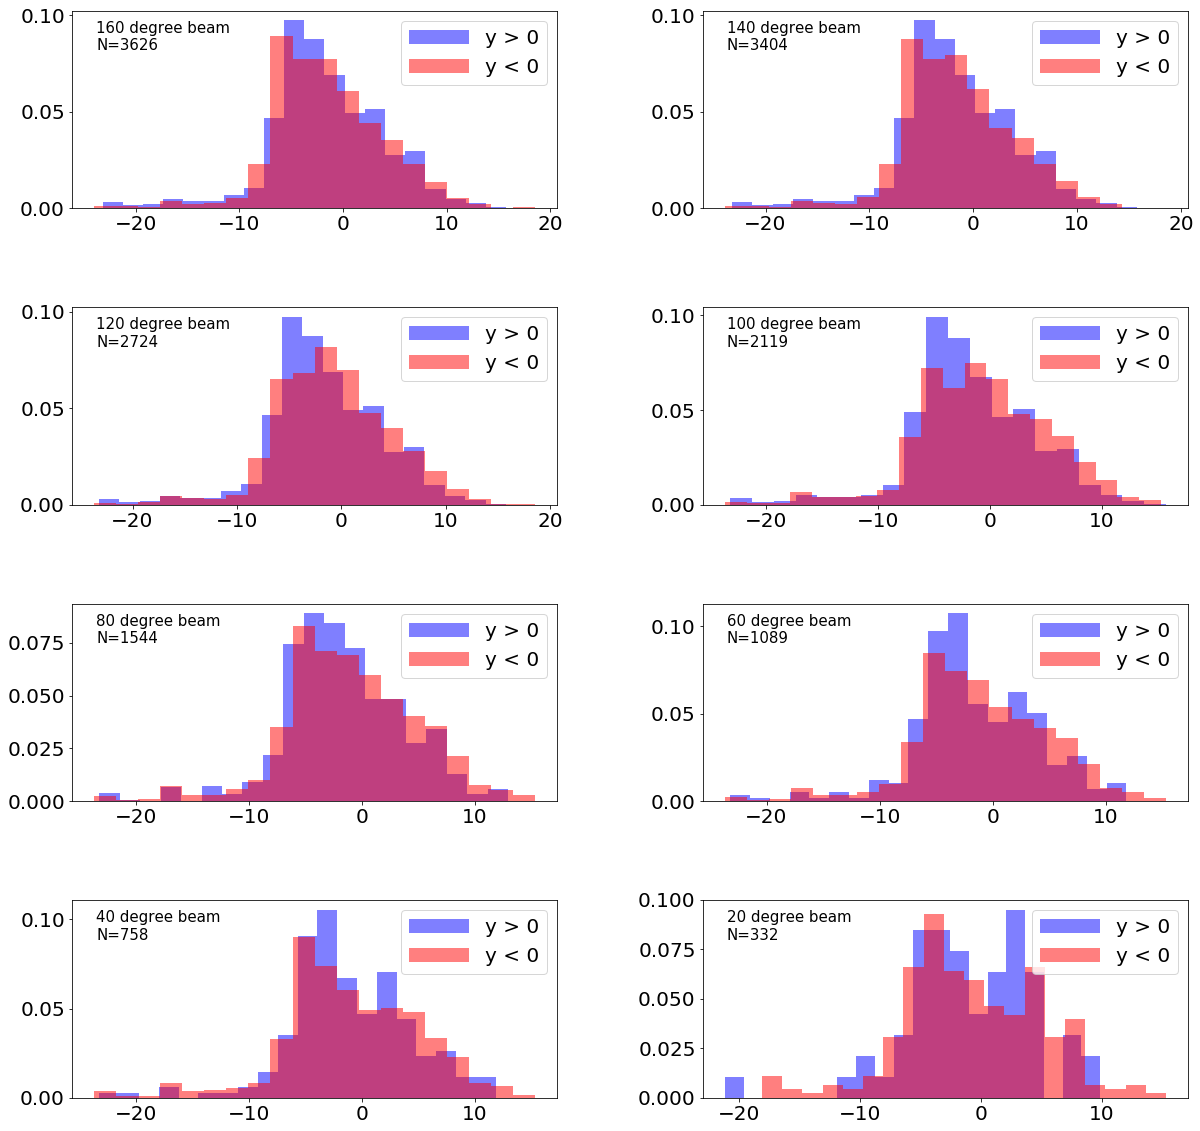

In [13]:
gyrochrone = gyr.MM09e3(df['B_V'], 600)
finite_age_mask = np.isfinite(gyrochrone)
noclusters = (df['k2_campaign_str'] != b'16') & (df['k2_campaign_str'] != b'5') & (df['k2_campaign_str'] != b'4')
fig, axs = pl.subplots(4, 2, figsize=(20, 20))
pl.subplots_adjust(wspace=0.3, hspace=0.5)
axs = np.concatenate(axs)
for i in range(len(theta)): 
    forward = (np.abs(angle) > theta[i]) & (ycoord > 0)
    backward = (np.abs(angle) > theta[i]) & (ycoord < 0)
    perdiff = np.exp(df['logperiod_mean'][finite_age_mask][noclusters]) - gyrochrone[finite_age_mask][noclusters]
    axs[i].annotate("{0} degree beam\nN={1}".format(180-2*theta[i], len(perdiff[forward])+len(perdiff[backward])), 
                    xy=(0.05, 0.8), xycoords='axes fraction', fontsize=15)
    axs[i].hist(perdiff[forward], color='b', density=True, bins=20, alpha=0.5, label="y > 0")
    axs[i].hist(perdiff[backward], color='r', density=True, bins=20, alpha=0.5, label="y < 0")
    axs[i].legend(loc="upper right")